In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
!pip install folium
!pip install pandas dash
!pip3 install httpx==0.20 dash plotly
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
#import folium this is also working good

In [47]:

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(file_path)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [ ]:
df.head()

In [ ]:
df["Automobile_Sales"].head(50)

In [ ]:
df.describe()

In [51]:
df.shape

(528, 15)

In [ ]:
df.columns

In [ ]:
df.dtypes

**Creating Visualizations for Data Analysis**

**TASK 1.1**: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

Text(0, 0.5, 'Number of Automobiles')

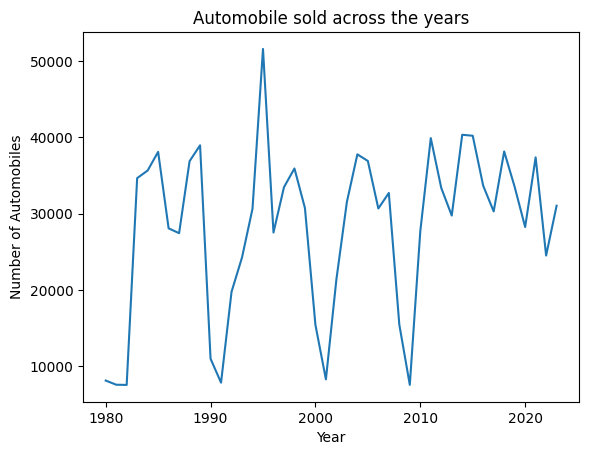

In [58]:
temp = df.groupby("Year")["Automobile_Sales"].sum()
temp.plot(x="Year", y="Automobile_Sales", kind="line")
plt.title("Automobile sold across the years")
plt.xlabel("Year")
plt.ylabel("Number of Automobiles")

In [ ]:
plt.figure(figsize=(10, 6))
temp.plot(x="Year", y="Automobile_Sales", kind="line")
plt.xticks(list(range(df.Year.unique().min(), df.Year.unique().max()+1)), rotation=75)
years = [1979.5, 1981.5, 1991.5, 2000.6, 2008.2, 2006.7]
texts = ["1980 Recession",
         "1981-82 Recession",
         "1991 Recession",
         "2000-2001 Recession",
         "2007-2009 Recession",
         "2020 (Covid-19 Impact) Recession"]
positions = [(i+1)*(10**4) for i in range(len(years))]
positions = [10000, 9000, 9000, 16000, 22000, 32000]
for year, text, pos in zip(years, texts, positions):
    if year==1979.5:
        plt.text(year, pos, text, rotation=90, color="blue",
             bbox=dict(boxstyle="larrow",
                       ec=(1., 0.5, 0.5),
                       fc=(1., 0.8, 0.8)
                      )
            )
        continue
    if year==2006.7:
        plt.text(year, pos, text, rotation=-30, color="blue",
             bbox=dict(boxstyle="rarrow",
                       ec=(1., 0.5, 0.5),
                       fc=(1., 0.8, 0.8)
                      )
            )
        continue
    plt.text(year, pos, text, rotation=45, color="blue",
             bbox=dict(boxstyle="larrow",
                       ec=(1., 0.5, 0.5),
                       fc=(1., 0.8, 0.8)
                      )
            )
plt.grid()
plt.title("Automobile sold across the years")
plt.xlabel("Year")
plt.ylabel("Number of Automobiles")

**TASK 1.2:** Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

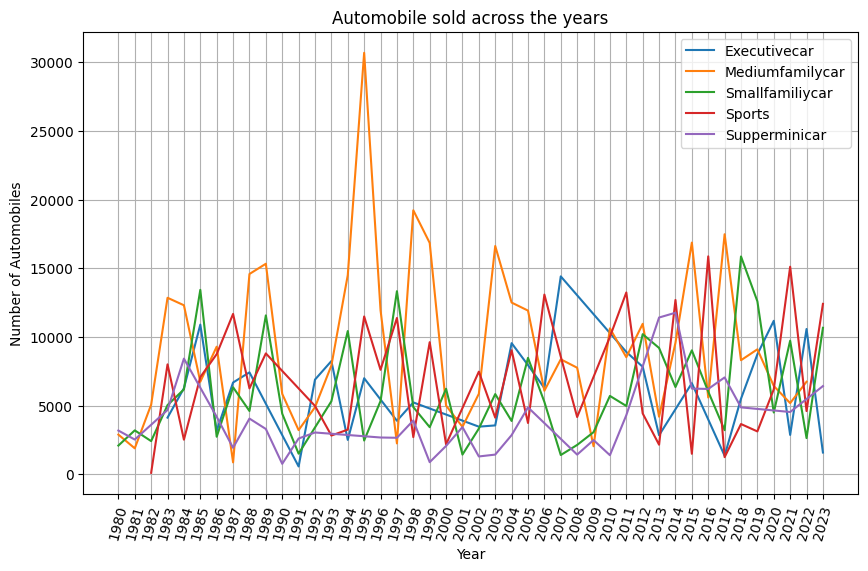

In [60]:
plt.figure(figsize=(10, 6))
temp = df.groupby(["Year", "Vehicle_Type"])[["Automobile_Sales"]].sum().reset_index()
temp.set_index("Year", inplace=True)
temp = temp.groupby(["Vehicle_Type"])["Automobile_Sales"]
temp.plot(kind="line")
plt.xticks(list(range(df.Year.unique().min(), df.Year.unique().max()+1)), rotation=75)
plt.grid()
plt.title("Automobile sold across the years")
plt.xlabel("Year")
plt.ylabel("Number of Automobiles")
plt.legend()

**TASK 1.3:** Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

In [ ]:
temp=df.groupby(["Recession"])["Automobile_Sales"].mean().reset_index()
temp["Recession"] = temp["Recession"].replace({0:"No Recession", 1:"Recession"})
# temp
plt.figure(figsize=(10, 6))
sns.barplot(data=temp, x="Recession", y="Automobile_Sales")
plt.xlabel('Period')
plt.ylabel('Average sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')

**Seaborn library**

In [ ]:
temp=df.groupby(["Vehicle_Type", "Recession"])["Automobile_Sales"].mean().reset_index()
temp["Recession"] = temp["Recession"].replace({0:"No", 1:"Yes"})
plt.figure(figsize=(10, 6))
sns.barplot(data=temp, x="Vehicle_Type", y="Automobile_Sales", hue="Recession")
plt.xlabel('VEhicle Type')
plt.ylabel('Average sales')
plt.title('Average Automobile Sales per Vehicle Type during Recession and Non-Recession')

**TASK 1.4:** Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

In [ ]:
temp = df.groupby(["Recession","Year"])["GDP"].mean().reset_index()
no = temp[temp["Recession"] == 0]
yes = temp[temp["Recession"] == 1]
fig = plt.figure(figsize=(10, 6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
no.plot(x="Year", y="GDP", kind="line", ax=ax0)
ax0.set_title('GDP Variation during No Recession Period')
ax0.set_ylabel('GDP')
yes.plot(x="Year", y="GDP", kind="line", ax=ax1)
ax1.set_title('GDP Variation during Recession Period')
ax1.set_ylabel('GDP')
plt.show()

**TASK 1.5**: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

In [ ]:
temp = df.copy()
months=temp["Month"].unique().tolist()
# display(months)
temp["Month"] = temp["Month"].replace(dict(zip(months, range(0,len(months)))))
temp = temp.groupby("Month")[["Automobile_Sales", "Seasonality_Weight"]].mean().reset_index()
# display(temp)
plt.figure(figsize=(10, 6))
plt.xticks(ticks=range(0,len(months)),labels=months)
sns.scatterplot(data=temp,
                x='Month',
                y='Automobile_Sales',
                hue="Seasonality_Weight",
                size="Seasonality_Weight",  # pass in weights
                #sizes=(20, 1500)
               )
plt.xlabel("Month")
plt.ylabel("Automobile Sales")
plt.title("Automobile Sales per Month according to Seasonality Weight")
plt.legend(loc="right")

**TASK 1.6:** Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df["Recession"]==1], x='Consumer_Confidence', y='Automobile_Sales')
plt.title("Consumer Confidence and Automobile Sales during Recessions")
plt.xlabel("Consumer Confidence")
plt.ylabel("Automobile Sales")
plt.show()

**TASK 1.7:** Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods

In [ ]:
temp=df.groupby("Recession")["Advertising_Expenditure"].sum()/df["Advertising_Expenditure"].sum()
temp.index=["No Recession", "Recession"]
display(temp)
temp.plot(kind="pie",
          figsize=(12, 8),
          y="Advertising_Expenditure",
          #ylabel=dict(ylabel="Advertising Expenditure",fontsize=100),
          x="Recession",
          #title="HOLA",
          autopct='%1.1f%%',
          textprops={'color':"w", "size":22},
         )
plt.ylabel(ylabel="Advertising Expenditure",fontsize=20)
plt.title(label="Advertising Expenditure during\n Recession and No Recession periods",fontsize=25)
plt.legend(fontsize=15)
plt.show()

**TASK 1.8:** Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

In [ ]:
temp=df[df["Recession"]==1].groupby("Vehicle_Type")["Advertising_Expenditure"].sum()
temp.plot(kind="pie",
          figsize=(12, 8),
          autopct='%1.1f%%',
          y="Advertising_Expenditure",
          textprops={'color':"w", "size":20},
         )
plt.ylabel(ylabel="Advertising Expenditure",fontsize=20)
plt.title(label="Advertising Expenditure during\n Recession period per Vehicle type",fontsize=25)
plt.legend(title="Vehicle Type", loc="best", fontsize=11)
plt.show()

**TASK 1.9:** Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

In [ ]:
#df.columns
plt.figure(figsize=(10,6))
sns.countplot(data=df[df["Recession"]==1], x="unemployment_rate", hue="Vehicle_Type")
plt.xlabel("Unemployment Rate")
plt.ylabel("Count")
plt.title("Effect of Unemployment Rate on Vehicle Type and Sales")
plt.legend(loc="upper right", title="Vehicle Type")

**TASK 1.10** Create a map on the hightest sales region/offices of the company during recession period

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json
!head -2 us-states.json

filename = "us-states.json"
!head -2 us-states.json

In [ ]:
temp=pd.read_json(filename)
for row in temp["features"]:
    print(row["id"], row["properties"]["name"])

In [71]:
import folium

us_geo = r"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json"

temp=df[df["Recession"]==1]

us_map = folium.Map(location=[40.60987815505275, -100.77676139515009], zoom_start=4)

folium.Choropleth(
    geo_data=us_geo,
    data=temp,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(us_map)

us_map